##SUMMARY

Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket





In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
train=pd.read_excel('/Users/drram/Documents/datasets/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [136]:
test=pd.read_excel('/Users/drram/Documents/datasets/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [137]:
print(train.shape)
print("")
print(test.shape)

(10683, 11)

(2671, 10)


In [138]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [139]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [140]:
print(train.info())
print("")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   

In [141]:
print(train.dtypes)
print("")
print(test.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


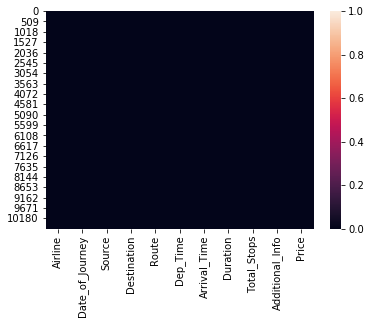

In [142]:
print(train.isnull().sum())
print("")
print(sns.heatmap(train.isnull()))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


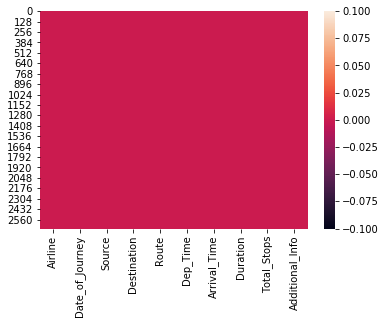

In [143]:
print(test.isnull().sum())
print("")
print(sns.heatmap(test.isnull()))

In [144]:
#checking the unique values in the training dataset
for i in train.columns:
    print(train[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    15

In [145]:
#checking the unique values in the testing dataset
for i in test.columns:
    print(test[i].value_counts())
    print("\n")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
3/04/2019      

In [146]:
#Replacing the value 'New Delhi' in the datasets with 'Delhi' as both are the same cities

train['Destination']=train['Destination'].replace('New Delhi', 'Delhi')
test['Destination']=test['Destination'].replace('New Delhi', 'Delhi')

In [147]:
#Checking the unique values of the destination column in both the dataset to see if New Delhi is replaced by Delhi
print(train['Destination'].value_counts())
print("\n")
print(test['Destination'].value_counts())

# New Delhi has been replaced with Delhi successfully

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [148]:
#extracting day, month and year from date_of_journey
train['Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['year']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.year
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [149]:
#Cleaning Departure and Arrival Times
# Training Set
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

# Test Set
test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [150]:
print(train['Additional_Info'].value_counts())
print("\n")
print(test['Additional_Info'].value_counts())

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64


No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64


In [151]:
#Checking the row where data is missing
train[train.isnull().any(axis=1)]

#The two values missing pertains to one row where flight has left from Delhi to Cochin. So to fill the missing values, we will analyse the flights(Air India) which has left for same route and similar flight price

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,45,9,25


In [152]:
delhicochin=train.loc[(train['Source']=='Delhi') & (train['Destination']=='Cochin')]
delhicochin

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907,1,6,2019,9,45,23,0
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,26h 35m,2 stops,No info,14011,3,3,2019,16,40,19,15
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,4h 30m,1 stop,No info,5830,15,4,2019,8,45,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,11h 15m,1 stop,No info,9929,15,6,2019,8,0,19,15
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,8h 40m,1 stop,No info,9794,1,5,2019,10,20,19,0


In [153]:
train['Route']=train['Route'].replace(np.nan, 'DEL → TRV → COK')
train['Total_Stops']=train['Total_Stops'].replace(np.nan, '1 stop')

In [154]:
train.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Day                    0
Month                  0
year                   0
Depart_Time_Hour       0
Depart_Time_Minutes    0
Arr_Time_Hour          0
Arr_Time_Minutes       0
dtype: int64

#Univariate Analysis

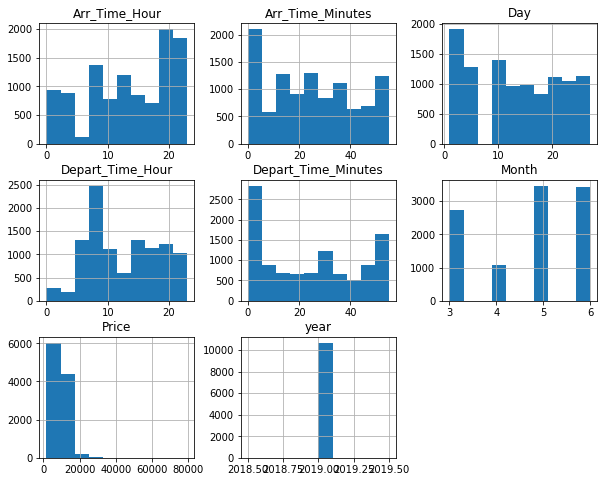

In [100]:
train.hist(figsize=(10,8))
plt.show()

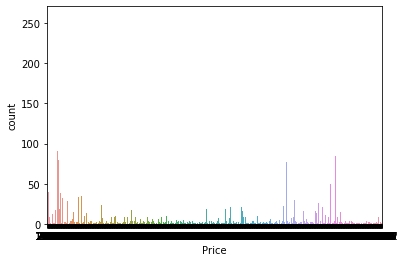

In [66]:
sns.countplot(train['Price'])

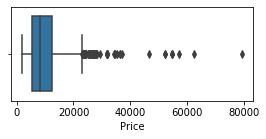

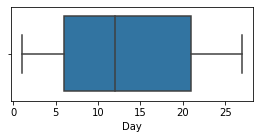

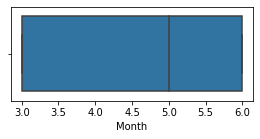

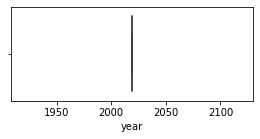

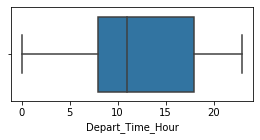

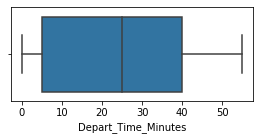

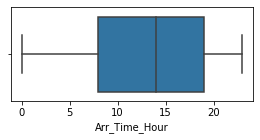

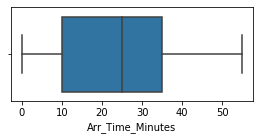

In [67]:
for i in train.columns:
    if train[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(train[i])

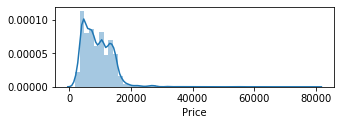

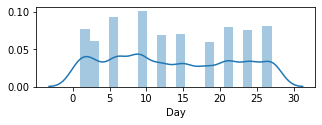

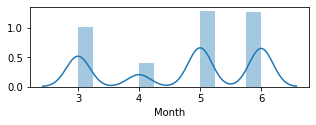

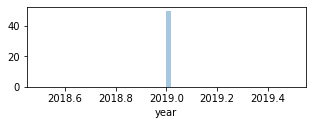

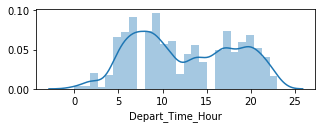

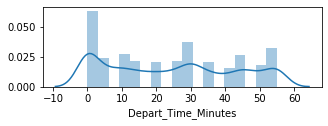

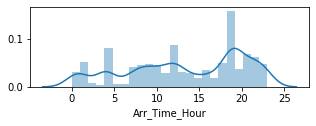

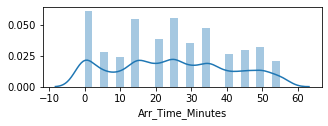

In [68]:
#training data
for i in train.columns:
    if train[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(train[i])

##Statistical Analysis

In [122]:
train.describe()

,Price,Day,Month,year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
count,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000



                        Price       Day     Month  year  Depart_Time_Hour  \
Price                1.000000 -0.153738 -0.103651   NaN          0.006819   
Day                 -0.153738  1.000000 -0.038378   NaN          0.002220   
Month               -0.103651 -0.038378  1.000000   NaN          0.039112   
year                      NaN       NaN       NaN   NaN               NaN   
Depart_Time_Hour     0.006819  0.002220  0.039112   NaN          1.000000   
Depart_Time_Minutes -0.024492 -0.008261 -0.059238   NaN         -0.024806   
Arr_Time_Hour        0.024264 -0.003192 -0.003941   NaN          0.005215   
Arr_Time_Minutes    -0.086155 -0.017511 -0.100626   NaN          0.067909   

                     Depart_Time_Minutes  Arr_Time_Hour  Arr_Time_Minutes  
Price                          -0.024492       0.024264         -0.086155  
Day                            -0.008261      -0.003192         -0.017511  
Month                          -0.059238      -0.003941         -0.100626  
y

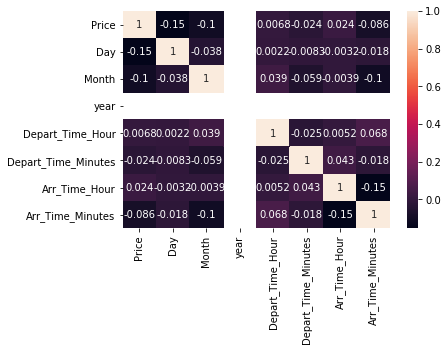

In [123]:
sns.heatmap(train.corr(), annot=True)
print("")
print(train.corr())

Observation-
as seen above, year has the same value so, we can drop it

In [124]:
train['year']=train.drop('year', axis=1, inplace=True)


                     Depart_Time_Hour  Depart_Time_Minutes  Arr_Time_Hour  \
Depart_Time_Hour             1.000000            -0.034524       0.000147   
Depart_Time_Minutes         -0.034524             1.000000       0.046824   
Arr_Time_Hour                0.000147             0.046824       1.000000   
Arr_Time_Minutes             0.066751            -0.020065      -0.136215   

                     Arr_Time_Minutes  
Depart_Time_Hour             0.066751  
Depart_Time_Minutes         -0.020065  
Arr_Time_Hour               -0.136215  
Arr_Time_Minutes             1.000000  


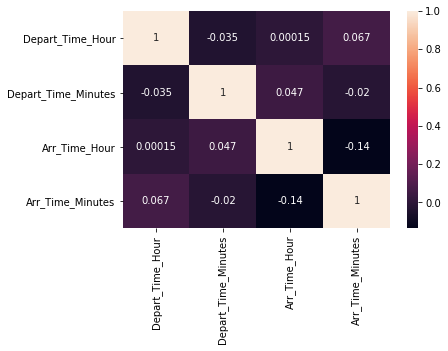

In [125]:
sns.heatmap(test.corr(), annot=True)
print("")
print(test.corr())

Encoding the data

In [155]:
#training data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in train.columns:
    if train.columns.dtype=='O':
        train[i]=lb.fit_transform(train[i])

In [156]:
#training data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in test.columns:
    if test.columns.dtype=='O':
        test[i]=lb.fit_transform(test[i])

In [128]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,year
0,3,24,0,2,18,240,4,8,65,8,0,22,4,1,2,0
1,1,6,3,0,84,336,1,8,669,0,2,5,10,13,3,0
2,4,43,2,1,118,106,1,8,1537,3,3,9,5,4,5,0
3,3,10,3,0,91,311,0,8,389,4,2,18,1,23,6,0
4,3,0,0,2,29,303,0,8,1457,0,0,16,10,21,7,0


In [157]:
#test dataset


from scipy.stats import zscore
z=np.abs(zscore(test))
print("The shape of dataset before removing the outliers is", test.shape)
test=test[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", test.shape)

The shape of dataset before removing the outliers is (2671, 12)
The shape of dataset after removing the outliers is (2668, 12)


In [158]:
train.skew()

Airline                0.731095
Date_of_Journey       -0.070888
Source                -0.424054
Destination            0.846715
Route                 -0.501948
Duration              -0.213427
Total_Stops            0.631681
Additional_Info       -1.779838
Price                  0.114408
Day                    0.067680
Month                 -0.387493
year                   0.000000
Depart_Time_Hour       0.113073
Depart_Time_Minutes    0.167029
Arr_Time_Hour         -0.369988
Arr_Time_Minutes       0.110945
dtype: float64

Splitting the train and test data

In [159]:
#training dataset
x=train.drop(['Price'],axis=1)
y=pd.DataFrame(train['Price'])
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,3,24,0,2,18,240,4,8,8,0,0,22,4,1,2
1,1,6,3,0,84,336,1,8,0,2,0,5,10,13,3
2,4,43,2,1,118,106,1,8,3,3,0,9,5,4,5
3,3,10,3,0,91,311,0,8,4,2,0,18,1,23,6
4,3,0,0,2,29,303,0,8,0,0,0,16,10,21,7


In [160]:
y.head()

,Price
0,65
1,669
2,1537
3,389
4,1457


In [161]:
#Scaling training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.410675,0.021472,-1.658441,0.815107,-1.547147,0.422875,1.407309,0.499892,1.227191,-1.467490,0.0,1.654259,-0.235050,-1.800427,-0.890057
1,-1.260999,-1.437532,0.890052,-1.159448,0.249808,1.306727,-0.253632,0.499892,-1.553388,0.250276,0.0,-1.303095,1.363492,-0.050851,-0.587124
2,0.014486,1.561532,0.040555,-0.172170,1.175511,-0.810835,-0.253632,0.499892,-0.510671,1.109160,0.0,-0.607247,0.031373,-1.363033,0.018744
3,-0.410675,-1.113308,0.890052,-1.159448,0.440394,1.076557,-0.807278,0.499892,-0.163098,0.250276,0.0,0.958411,-1.034321,1.407129,0.321677
4,-0.410675,-1.923866,-1.658441,0.815107,-1.247654,1.002903,-0.807278,0.499892,-1.553388,-1.467490,0.0,0.610487,1.363492,1.115533,0.624611


##selecting the best random state 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state
        

In [163]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.47718166377908 is achieved at r_state 82


82

In [164]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=64,test_size=0.20)

In [165]:
#using GridSearchCV to select best parameter for the models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [166]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [167]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [168]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.45873345485725847

The cross validation score is 0.45619107396963854

The mean absolute error is  339.30884185618015

The root mean square error is 18.420337723727545


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

The r2 score is  0.7470724391754884

The cross validation score is 0.7587800540931653

The mean absolute error is  136.30135704258305

The root mean square error is 11.67481721666695


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
         

In [169]:
result1=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result1

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.458733,0.456191,339.308842,18.420338
1,KNeighborsRegressor,0.747072,0.758780,136.301357,11.674817
2,DecisionTreeRegressor,0.898833,0.895735,81.705818,9.039127
3,SVR,0.568495,0.551357,281.635749,16.782007


#Let us try to improve the models using boosters and regularisation algorithms

###Lasso

In [170]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 1}

In [171]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

The maximum r2 score 0.4771974575280207 is achieved at r_state 82


82

In [172]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)



The cross validation score is 0.45623503527040626


###Ridge

In [173]:
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [174]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.477178782990232 is achieved at r_state 82


82

In [175]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)



The cross validation score is 0.45619125044732156


#Ensemble Techniques

#RandomForest

In [176]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor



In [177]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [178]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.948171071520669 is achieved at r_state 51


51

In [179]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.9397290894840177


##GradientBoostingRegressor

In [180]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [181]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=1)
max_r2_score(gb,x,y)

The maximum r2 score 0.9370540477686866 is achieved at r_state 77


77

In [182]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.9279635606082332


In [183]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [184]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=10,learning_rate=1)
max_r2_score(ad,x,y)

The maximum r2 score 0.711231756328091 is achieved at r_state 50


50

In [185]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.6849162323947864


In [186]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.539,0.539,0.923,0.930,0.716],'Cross_val_score':[0.505,0.505,0.912,0.918,0.697]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.539,0.505
1,Ridge,0.539,0.505
2,RandomForestRegressor,0.923,0.912
3,GradientBoostRegressor,0.930,0.918
4,AdaBoostRegressor,0.716,0.697


In [187]:
result1

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.458733,0.456191,339.308842,18.420338
1,KNeighborsRegressor,0.747072,0.758780,136.301357,11.674817
2,DecisionTreeRegressor,0.898833,0.895735,81.705818,9.039127
3,SVR,0.568495,0.551357,281.635749,16.782007


In [188]:
#by comparing the above results, we can conclude that gradient boosting regressor is providing best scores. 
#So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=97,test_size=0.20)
gb=GradientBoostingRegressor(learning_rate= 1, n_estimators= 500)
gb.fit(train_x,train_y)
pred=gb.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.930537763624907
The cross val score is 0.9281842998330332


In [191]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gb,'Project12_Flight_Ticket_price.pkl')

['Project12_Flight_Ticket_price.pkl']